# Stock trend classification (3/3): evaluate model

Ref:
https://www.youtube.com/watch?v=KqBuSvEGiZA

### Install libraries

In [1]:
!pip install seaborn

### Load datasets

In [2]:
import numpy as np
import pandas as pd

CLASSES = ['Bull', 'Bear']
LABEL_BULL = CLASSES.index('Bull')
LABEL_BEAR = CLASSES.index('Bear')

datasets = np.load('datasets.npz')
x_train, y_train = datasets['x_train'], datasets['y_train']
x_val, y_val = datasets['x_val'], datasets['y_val']
x_test, y_test = datasets['x_test'], datasets['y_test']

# Label distribution
label_distribution = pd.DataFrame([{'Dataset': 'train',
                                    'Bull': np.count_nonzero(y_train == LABEL_BULL),
                                    'Bear': np.count_nonzero(y_train == LABEL_BEAR)},
                                   {'Dataset': 'val',
                                    'Bull': np.count_nonzero(y_val == LABEL_BULL),
                                    'Bear': np.count_nonzero(y_val == LABEL_BEAR)},
                                   {'Dataset': 'test',
                                    'Bull': np.count_nonzero(y_test == LABEL_BULL),
                                    'Bear': np.count_nonzero(y_test == LABEL_BEAR)}])
label_distribution

,Dataset,Bull,Bear
0,train,827,828
1,val,237,236
2,test,107,107


### Load model

In [3]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

model = keras.models.load_model('best_model.keras')

### Evaluate model

In [4]:
model.evaluate(x_test, to_categorical(y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6896 - loss: 0.6605


[0.6994628310203552, 0.4813084006309509]

In [5]:
# Draw confusion matrix
from tensorflow.math import argmax, confusion_matrix

y_pred_prob = model.predict(x_test)
y_pred = argmax(y_pred_prob, axis=-1)
cm = confusion_matrix(y_test, y_pred, num_classes=len(CLASSES)).numpy()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [6]:
cm

array([[91, 16],
       [95, 12]], dtype=int32)

Text(33.22222222222222, 0.5, 'Label')

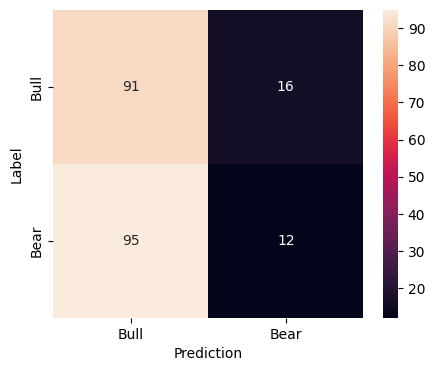

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(cm, xticklabels=CLASSES, yticklabels=CLASSES,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')

In [8]:
n_bull_pred = cm[LABEL_BULL, LABEL_BULL] + cm[LABEL_BEAR, LABEL_BULL]
n_bull_true_pos = cm[LABEL_BULL, LABEL_BULL]
bull_accuracy = n_bull_true_pos / n_bull_pred if n_bull_pred > 0 else 0

n_bear_pred= cm[LABEL_BULL, LABEL_BEAR] + cm[LABEL_BEAR, LABEL_BEAR]
n_bear_true_pos = cm[LABEL_BEAR, LABEL_BEAR]
bear_accuracy = n_bear_true_pos / n_bear_pred if n_bear_pred > 0 else 0

n_total_pred = n_bull_pred + n_bear_pred
n_total_true_pos = n_bull_true_pos + n_bear_true_pos
total_accuracy = n_total_true_pos / n_total_pred if n_total_pred > 0 else 0

pd.DataFrame([{'Prediction': 'Bull', 'Accuracy': bull_accuracy},
              {'Prediction': 'Bear', 'Accuracy': bear_accuracy},
              {'Prediction': 'Total', 'Accuracy': total_accuracy},
              ])

,Prediction,Accuracy
0,Bull,0.489247
1,Bear,0.428571
2,Total,0.481308
